<a href="https://colab.research.google.com/github/alejandromunizsiques/WorkPlace/blob/master/Ejercicio_de_visualizaci%C3%B3n_de_datos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripcion de la tarea

Makeover Monday ofrece un reto semanal de recrear o mejorar visualizaciones de datos. ¡Tu tarea es elegir uno de las visualizaciones de datos para recrear o mejorar!

Para hacer esto:

Elegir un conjunto de datos de la Data Sets list. Puedes elegir un conjunto de datos reciente o uno del año anterior, ¡siempre y cuando te interese!
Descarga los datos que elegiste.
Usa Python para crear una visualización informativa y placentera a la vista usando los datos que seleccionaste.
También necesitas subir tu trabajo para esta tarea a GitHub, ¡así todos pueden ver lo fabulosa que es la visualización que creaste!

Para hacer esto:

Crea un nuevo repositorio de GitHub con un nombre informativo para su visualización o datos. (Nota: aquí hay instrucciones de cómo hacerlo si no estás segur. Asegúrate de marcar la casilla «Inicie este repositorio con un LÉAME.»).
Agrega tu código al repositorio GitHub que creaste. Puedes hacerlo en Google Colab seleccionando Archivo > «Guardar una Copia en GitHub».
Edita el LÉAME para crear un resumen informativo de los ejercicios que explican el propósito de la tarea/visualización, los datos y qué muestra/dice la visualización que creaste. ¡También podrías querer incluir una imagen estática de tu visualización final en el LÉAME! (Nota: los LÉAME son archivos markdown. Aquí hay una hoja con soluciones de markdown syntax.) ¡Intenta hacerlo lo más informativo y profesional posible, ya que esto es lo primero que las personas verán cuando entren a tu repositorio GitHub!
Una vez termines, envía un vínculo a tu repositorio GitHub para entregar esta tarea.

# Montado de GoogleDrive

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importacion de librerias

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install geopandas
import geopandas
import folium as folium

# Diccionario DataSet

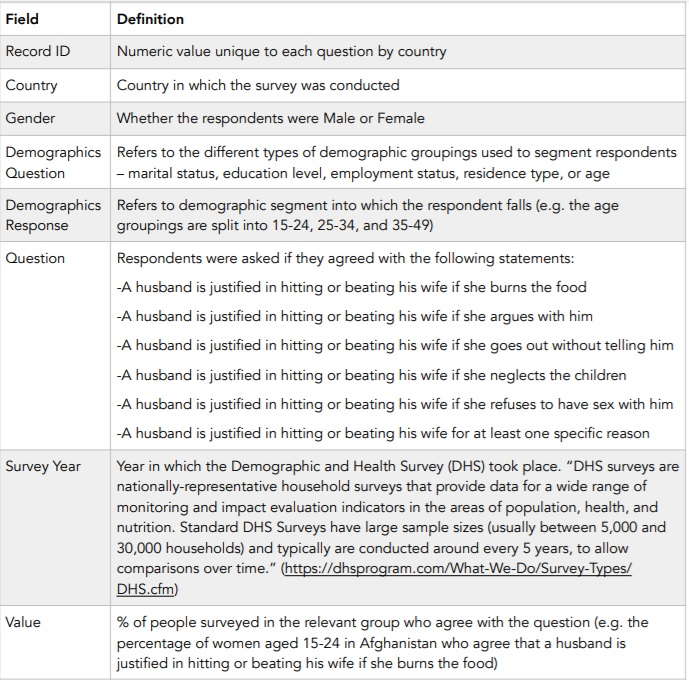

# Montaje de dataset

In [85]:
mapa = geopandas.read_file('/content/drive/MyDrive/Data Science Coding Dojo/ Visualización de datos con Python/custom.geo.json')
mapa

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,geou_dif,geounit,gu_a3,su_dif,subunit,su_a3,brk_diff,name,name_long,brk_a3,brk_name,brk_group,abbrev,postal,formal_en,formal_fr,note_adm0,note_brk,name_sort,name_alt,mapcolor7,mapcolor8,mapcolor9,mapcolor13,pop_est,gdp_md_est,pop_year,lastcensus,gdp_year,economy,income_grp,wikipedia,fips_10_,iso_a2,iso_a3,iso_n3,un_a3,wb_a2,wb_a3,woe_id,woe_id_eh,woe_note,adm0_a3_is,adm0_a3_us,adm0_a3_un,adm0_a3_wb,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename,geometry
0,0,Admin-0 country,3,Ecuador,ECU,0,2,Sovereign country,Ecuador,ECU,0,Ecuador,ECU,0,Ecuador,ECU,0,Ecuador,Ecuador,ECU,Ecuador,None,Ecu.,EC,Republic of Ecuador,None,None,None,Ecuador,None,1,5,2,12,14573101,107700.0,-99,2010,-99,6. Developing region,3. Upper middle income,-99,EC,EC,ECU,218,218,EC,ECU,23424801,23424801,Exact WOE match as country,ECU,ECU,-99,-99,South America,Americas,South America,Latin America & Caribbean,7,7,4,-99,1,ECU.geojson,"MULTIPOLYGON (((-80.11510 -2.99798, -80.13103 ..."
1,0,Admin-0 country,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,Bolivia,BOL,Bolivia,None,Bolivia,BO,Plurinational State of Bolivia,None,None,None,Bolivia,None,1,5,2,3,9775246,43270.0,-99,2001,-99,5. Emerging region: G20,4. Lower middle income,-99,BL,BO,BOL,068,068,BO,BOL,23424762,23424762,Exact WOE match as country,BOL,BOL,-99,-99,South America,Americas,South America,Latin America & Caribbean,7,7,7,-99,1,BOL.geojson,"POLYGON ((-65.29247 -11.50472, -65.25756 -11.4..."
2,1,Admin-0 country,5,United Kingdom,GB1,1,2,Dependency,Falkland Islands,FLK,0,Falkland Islands,FLK,0,Falkland Islands,FLK,1,Falkland Is.,Falkland Islands,B12,Falkland Is.,None,Flk. Is.,FK,Falkland Islands,None,U.K.,Admin. by U.K.; Claimed by Argentina,Falkland Islands,Islas Malvinas,6,6,6,3,3140,105.1,-99,-99,-99,2. Developed region: nonG7,1. High income: OECD,-99,FK,FK,FLK,238,238,-99,-99,23424814,23424814,Exact WOE match as country,FLK,FLK,-99,-99,South America,Americas,South America,Latin America & Caribbean,12,16,8,-99,-99,FLK.geojson,"MULTIPOLYGON (((-59.74249 -52.35797, -59.72025..."
3,0,Admin-0 country,4,Guyana,GUY,0,2,Sovereign country,Guyana,GUY,0,Guyana,GUY,0,Guyana,GUY,0,Guyana,Guyana,GUY,Guyana,None,Guy.,GY,Co-operative Republic of Guyana,None,None,None,Guyana,None,3,1,4,8,772298,2966.0,-99,2002,-99,6. Developing region,4. Lower middle income,-99,GY,GY,GUY,328,328,GY,GUY,23424836,23424836,Exact WOE match as country,GUY,GUY,-99,-99,South America,Americas,South America,Latin America & Caribbean,6,6,4,-99,1,GUY.geojson,"MULTIPOLYGON (((-58.44103 6.90477, -58.46052 6..."
4,0,Admin-0 country,2,Brazil,BRA,0,2,Sovereign country,Brazil,BRA,0,Brazil,BRA,0,Brazil,BRA,0,Brazil,Brazil,BRA,Brazil,None,Brazil,BR,Federative Republic of Brazil,None,None,None,Brazil,None,5,6,5,7,198739269,1993000.0,-99,2010,-99,3. Emerging region: BRIC,3. Upper middle income,-99,BR,BR,BRA,076,076,BR,BRA,23424768,23424768,Exact WOE match as country,BRA,BRA,-99,-99,South America,Americas,South America,Latin America & Caribbean,6,6,6,-99,1,BRA.geojson,"MULTIPOLYGON (((-48.54259 -27.81666, -48.55187..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0,Admin-0 country,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,Tanzania,TZA,Tanzania,None,Tanz.,TZ,United Republic of Tanzania,None,None,None,Tanzania,None,3,6,2,2,41048532,54250.0,-99,2002,-99,7. Least developed region,5. Low income,-99,TZ,TZ,TZA,834,834,TZ,TZA,23424973,23424973,Exact WOE match as country,TZA,TZA,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,TZA.geojson,"MULTIPOLYGON (((39.74916 -8.06549, 3

In [86]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Coding Dojo/ Visualización de datos con Python/DF_Violencia.csv')
df

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8
...,...,...,...,...,...,...,...,...
12595,210,Zimbabwe,M,Residence,Urban,... if she goes out without telling him,01/01/2015,11.8
12596,280,Zimbabwe,M,Residence,Rural,... if she neglects the children,01/01/2015,20.1
12597,280,Zimbabwe,M,Residence,Urban,... if she neglects the children,01/01/2015,15.0
12598,350,Zimbabwe,M,Residence,Rural,... if she refuses to have sex with him,01/01/2015,7.2


# Informacion del dataset

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               12600 non-null  int64  
 1   Country                12600 non-null  object 
 2   Gender                 12600 non-null  object 
 3   Demographics Question  12600 non-null  object 
 4   Demographics Response  12600 non-null  object 
 5   Question               12600 non-null  object 
 6   Survey Year            12600 non-null  object 
 7   Value                  11187 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 787.6+ KB


# Limpieza del dataset

In [88]:
country_group = df.groupby(["Country"])[["Value"]].mean()
a = country_group.index
country_group









,Value
Country,
Afghanistan,42.683333
Albania,5.417778
Angola,13.202222
Armenia,9.553571
Azerbaijan,32.666071
...,...
Uganda,24.840556
Ukraine,3.692308
Yemen,27.621111


In [89]:
table = country_group.merge(mapa,how='left',left_on=["Country"],right_on=["sovereignt"])

table = table.dropna()
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 68 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Value       0 non-null      float64 
 1   scalerank   0 non-null      float64 
 2   featurecla  0 non-null      object  
 3   labelrank   0 non-null      float64 
 4   sovereignt  0 non-null      object  
 5   sov_a3      0 non-null      object  
 6   adm0_dif    0 non-null      float64 
 7   level       0 non-null      float64 
 8   type        0 non-null      object  
 9   admin       0 non-null      object  
 10  adm0_a3     0 non-null      object  
 11  geou_dif    0 non-null      float64 
 12  geounit     0 non-null      object  
 13  gu_a3       0 non-null      object  
 14  su_dif      0 non-null      float64 
 15  subunit     0 non-null      object  
 16  su_a3       0 non-null      object  
 17  brk_diff    0 non-null      float64 
 18  name        0 non-null      object  
 19  name_long   0 non-nu

In [90]:
bins = list(table["Value"].quantile([0, 0.25, 0.5, 0.75, 1]))
print


<function print>

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 126 entries, 0 to 125
Data columns (total 68 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   scalerank   126 non-null    int64   
 1   featurecla  126 non-null    object  
 2   labelrank   126 non-null    int64   
 3   sovereignt  126 non-null    object  
 4   sov_a3      126 non-null    object  
 5   adm0_dif    126 non-null    int64   
 6   level       126 non-null    int64   
 7   type        126 non-null    object  
 8   admin       126 non-null    object  
 9   adm0_a3     126 non-null    object  
 10  geou_dif    126 non-null    int64   
 11  geounit     126 non-null    object  
 12  gu_a3       126 non-null    object  
 13  su_dif      126 non-null    int64   
 14  subunit     126 non-null    object  
 15  su_a3       126 non-null    object  
 16  brk_diff    126 non-null    int64   
 17  name        126 non-null    object  
 18  name_long   126 non-null    object  
 19  

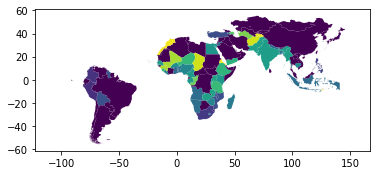

In [91]:
table = mapa.merge(country_group,how='left',left_on=["name"],right_on=["Country"])
table.info()
table = table.fillna(value=-5)
table.plot(column='Value')


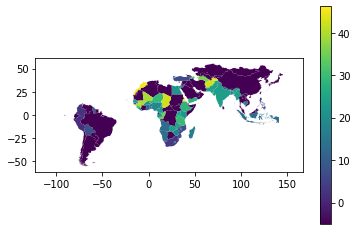

In [95]:

fig, ax = plt.subplots(1, 1) 
table.plot(column='Value', ax=ax, legend="agreement of violence against woman", )